<a href="https://colab.research.google.com/github/anahimaciel/Networks-in-cities/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy.distance

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os

In [23]:
cities=[]
total_users=[]
sig_users=[]
res_users=[]
radius=[]
city_size=[]

for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue

  cities.append(i)

  file=open("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/demo.txt",'r+')
  total_users.append(int(file.readline().split()[1])/1000)
  sig_users.append(int(file.readline().split()[2])/1000)
  file=open("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/demo2.txt",'r+')
  res_users.append(int(file.readline().split()[3])/1000)

  df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/results.txt")
  radius.append(float(df._get_value(len(df)-1,' total_distance')))

  antenna_df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/antennas_"+i+".txt", sep=";")
  print(i+": "+str(len(antenna_df))+" antenas")

  #CALCULATING DIAMETERS OF THE CITIES
  southernmost_point = antenna_df.sort_values(by='LAT').iloc[0]
  northernmost_point = antenna_df.sort_values(by='LAT', ascending=False).iloc[0]

  distance_NS = geopy.distance.geodesic((southernmost_point['LAT'], southernmost_point['LONG']), (northernmost_point['LAT'], northernmost_point['LONG'])).kilometers

  westernmost_point = antenna_df.sort_values(by='LONG').iloc[0]
  easternmost_point = antenna_df.sort_values(by='LONG', ascending=False).iloc[0]

  distance_EW = geopy.distance.geodesic((westernmost_point['LAT'], westernmost_point['LONG']), (easternmost_point['LAT'], easternmost_point['LONG'])).kilometers

  city_size.append((distance_NS+distance_EW)/2)
  print("        "+str((distance_NS+distance_EW)/2)+" km")

Caucaia: 116 antenas
        27.611816178519447 km
Franca: 75 antenas
        10.966781984468057 km
Jundiaí: 153 antenas
        18.525114045748055 km
Piracicaba: 152 antenas
        24.54439424308739 km
Suzano: 63 antenas
        19.014827044902358 km
Taubaté: 128 antenas
        17.82998973031993 km
Mogi das Cruzes: 98 antenas
        22.72532908365797 km
Montes Claros: 85 antenas
        9.219501334426795 km
Ponta Grossa: 90 antenas
        56.593213392103955 km
Rio Branco: 123 antenas
        12.28893152144105 km


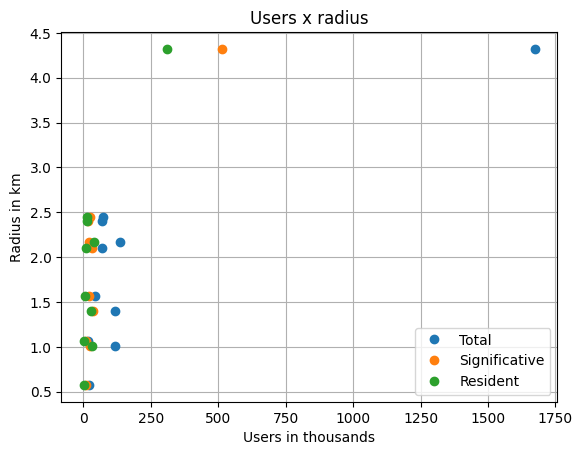

In [ ]:
# Plot
plt.plot(total_users, radius, 'o', label='Total')
plt.plot(sig_users, radius, 'o', label='Significative')
plt.plot(res_users, radius, 'o', label='Resident')

#labels for points
#for i in range(len(radius)):
#    plt.text(total_users[i], radius[i], cities[i], ha='right')
#    plt.text(sig_users[i], radius[i], cities[i], ha='right')
#    plt.text(res_users[i], radius[i], cities[i], ha='right')

# Customize plot
plt.xlabel('Users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

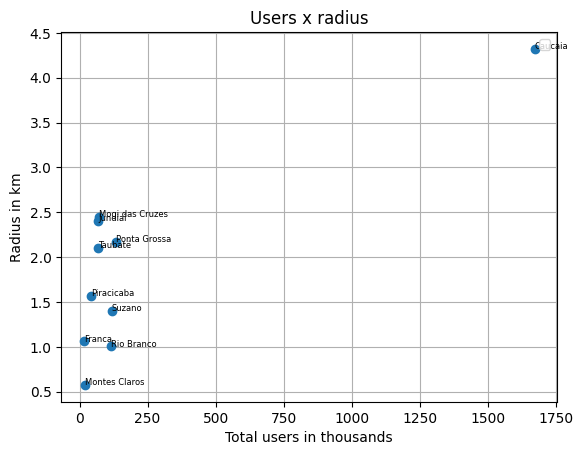

In [ ]:
# Plot
plt.plot(total_users, radius, 'o')

#labels for points
for i in range(len(radius)):
    plt.text(total_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Total users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

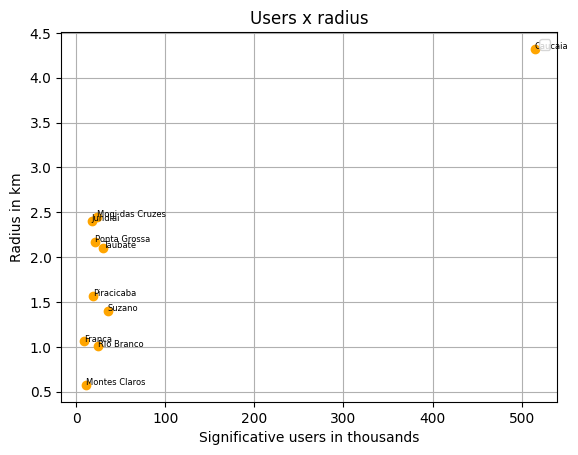

In [ ]:
# Plot
plt.plot(sig_users, radius, 'o',color="orange")

#labels for points
for i in range(len(radius)):
    plt.text(sig_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Significative users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

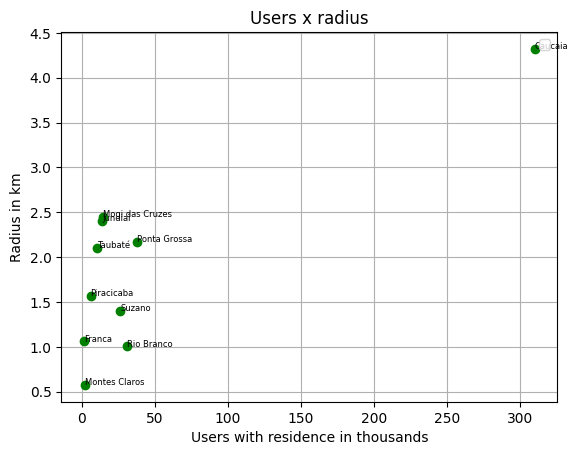

In [ ]:
# Plot
plt.plot(res_users, radius, 'o', color="green")

#labels for points
for i in range(len(radius)):
    plt.text(res_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Users with residence in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

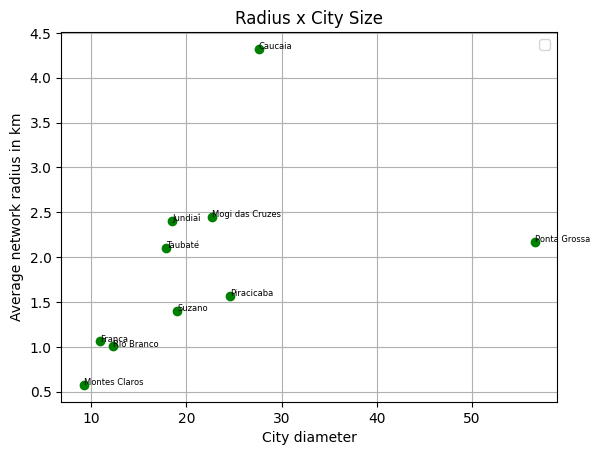

In [ ]:
# Plot
plt.plot(city_size, radius, 'o', color="green")

#labels for points
for i in range(len(radius)):
    plt.text(city_size[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('City diameter')
plt.ylabel('Average network radius in km')
plt.title('Radius x City Size')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Distributions


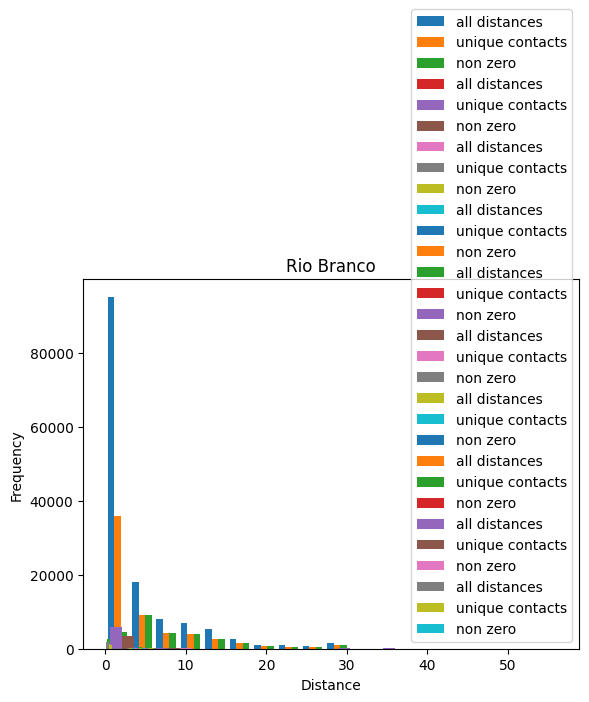

In [41]:
for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue

  filt_df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/filtered_cdr_2.txt")

  x=filt_df['distance']
  y=filt_df.groupby(['user_from','user_to']).first()['distance']
  z=y[y!=0]

  plt.hist([x,y,z], label= ['all distances','unique contacts','non zero'])

  plt.xlabel('Distance')
  plt.ylabel('Frequency')
  plt.title(f'{i}')

  plt.legend()

  plt.savefig("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/distribution.png")

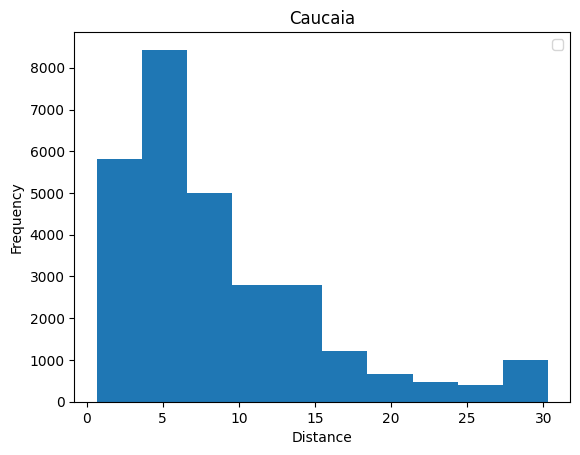

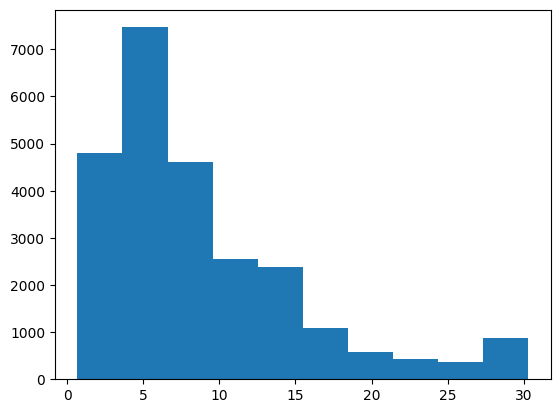

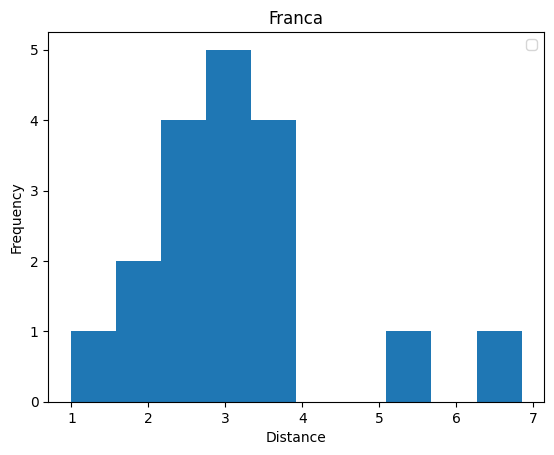

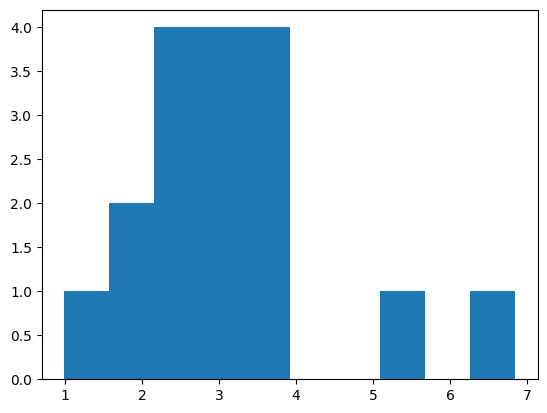

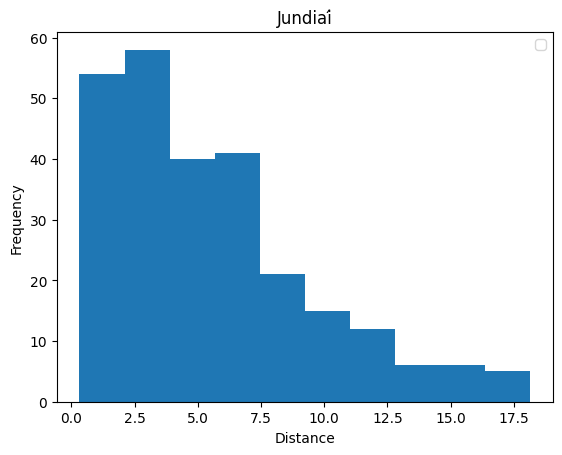

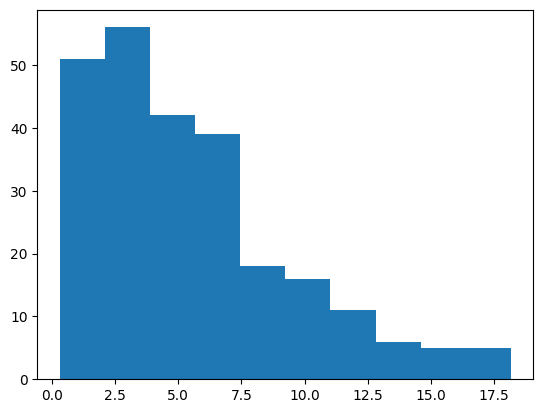

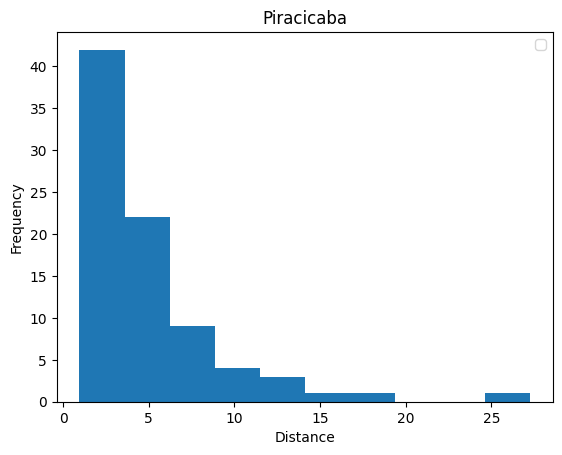

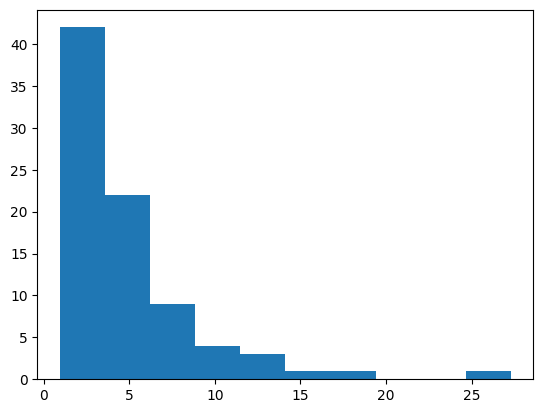

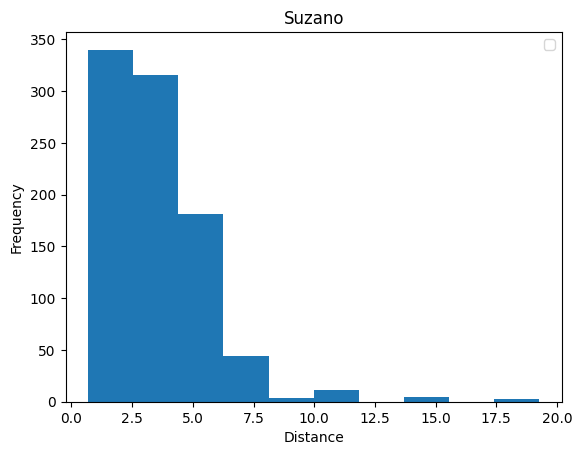

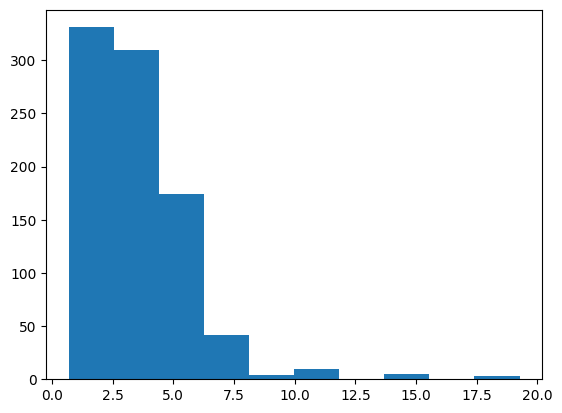

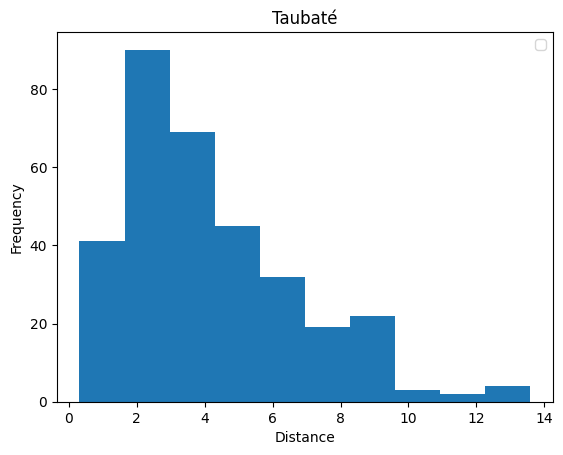

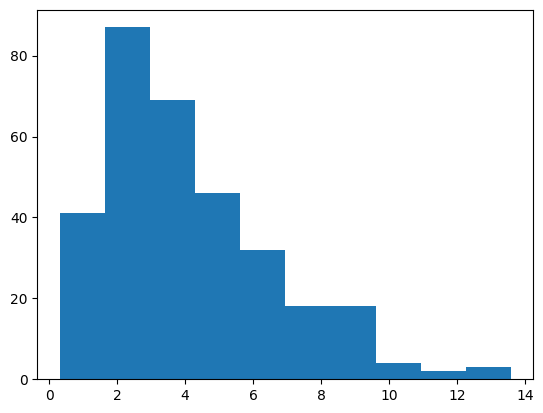

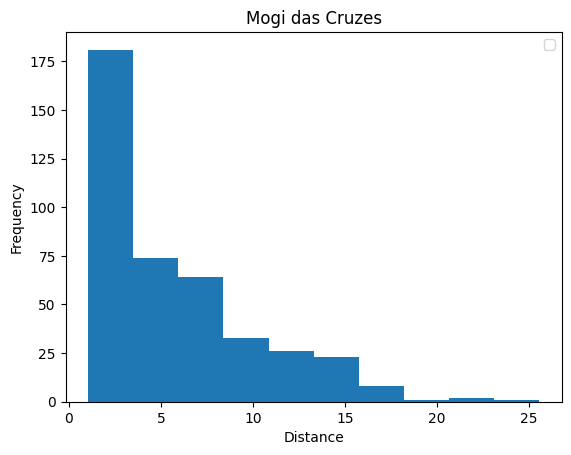

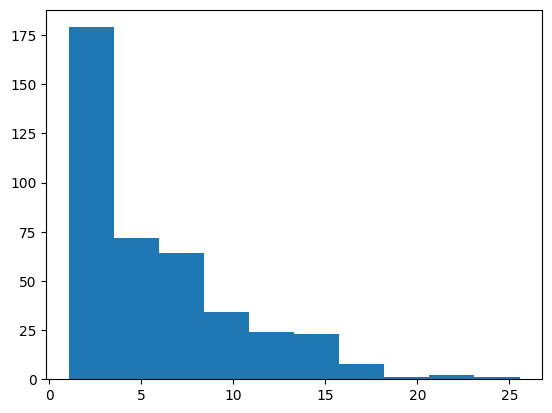

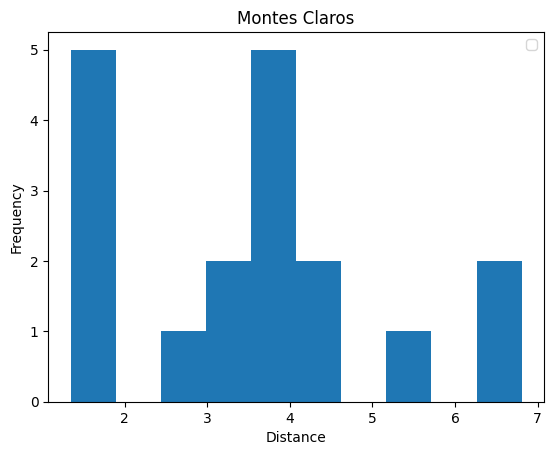

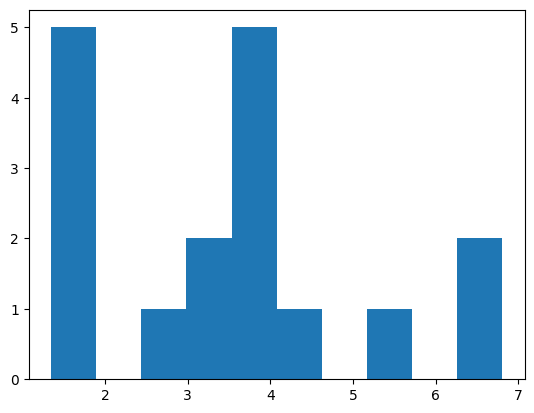

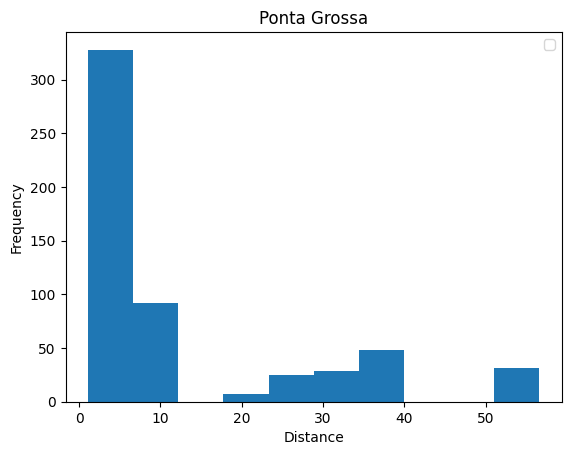

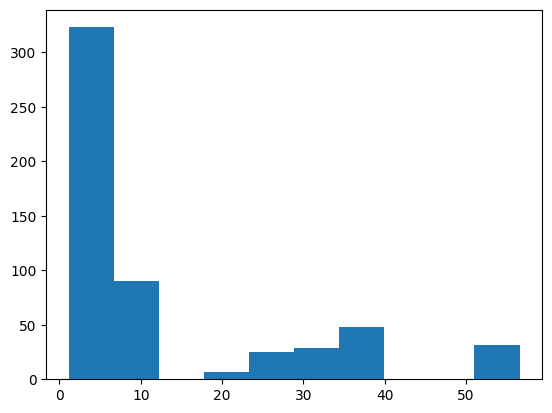

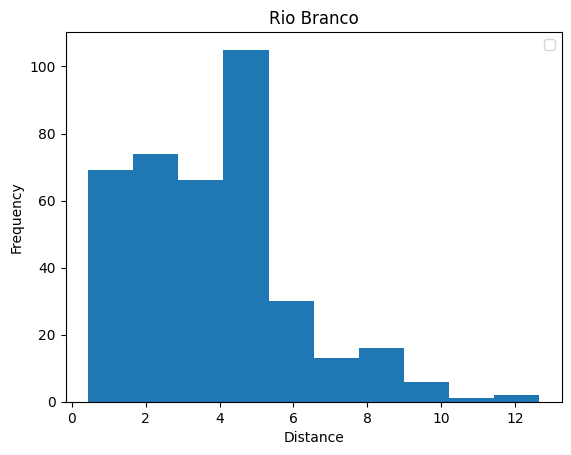

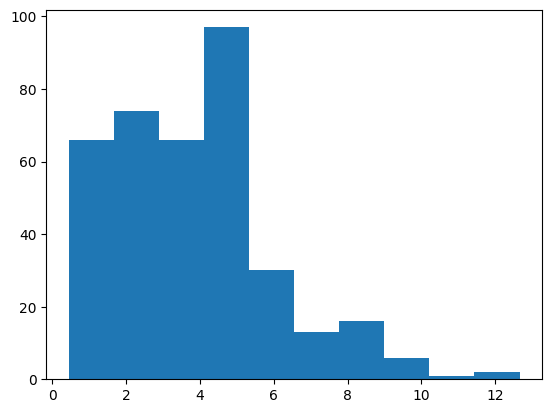

In [48]:
for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue

  filt_df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/filtered_cdr_2.txt")

  y=filt_df.groupby(['user_from','user_to']).first()
  y=y[y['distance']!=0]

  plt.hist(y['distance'])

  plt.xlabel('Distance')
  plt.ylabel('Frequency')
  plt.title(f'{i}')

  plt.legend()

  plt.show()

  radii=y.groupby("user_from").agg({'distance':['sum','size']})
  radii.columns=['total_distance','n_calls']
  radii['avg_radius']=radii['total_distance']/radii['n_calls']
  plt.hist(radii['avg_radius'])
  plt.show()

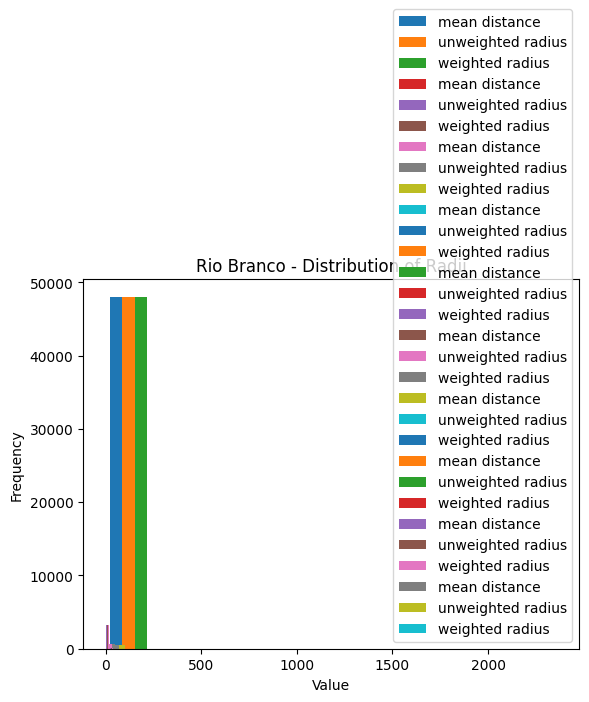

In [42]:
for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue
  radius_df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/radii.txt")

  x=radius_df['avg_dist_by_calls']
  y=radius_df['avg_radius_without_alpha']
  z=radius_df['avg_radius']

  plt.hist([x,y,z], label= ['mean distance','unweighted radius','weighted radius'])

  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title(f'{i} - Distribution of Radii')
  plt.legend()

  plt.savefig("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/distribution_avgs.png")